In [1]:
import matplotlib.pyplot as plt
from pydrake.all import (BasicVector, LeafSystem, DiagramBuilder, Simulator, LogOutput, ConstantVectorSource, 
                         LinearSystem)
import numpy as np
import scipy.linalg as la

In [7]:
# Define the system.
class Yuntian(LeafSystem):
    def __init__(self):
        LeafSystem.__init__(self)
        num_DTState = 1
        num_input = 1
        num_output = 2
        # Define the state vector
        self.DeclareDiscreteState(num_DTState)
        # Define the input
        self.DeclareVectorInputPort("u", BasicVector(num_input))
        # Define the output
        self.DeclareVectorOutputPort("y", BasicVector(num_output), self.CalcOutputY)
        self.DeclarePeriodicDiscreteUpdate(0.01)  # One second timestep.         
       
    def DoCalcDiscreteVariableUpdates(self, context, events, discrete_state):
        x = context.get_discrete_state_vector().CopyToVector()
        u = self.get_input_port(0).Eval(context)
        xnext = 0.98*x + 5*u
        discrete_state.get_mutable_vector().SetFromVector(xnext)
        
    def CalcOutputY(self, context, output):
        x = context.get_discrete_state_vector().CopyToVector()
        u = self.get_input_port(0).Eval(context)
        y = np.array([x,u])
        output.SetFromVector(y)

Text(0, 0.5, 'y(t)')

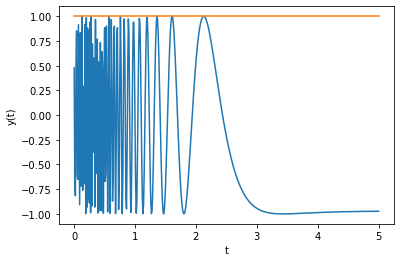

In [8]:
# testing 

# Create a simple block diagram containing our system.
builder = DiagramBuilder()
mySys_Yuntian = builder.AddSystem(Yuntian())
stepInput = builder.AddSystem(ConstantVectorSource([1]))  #step-input

builder.Connect(stepInput.get_output_port(0), mySys_Yuntian.get_input_port(0))  #connect input to mysystem
logger_output = LogOutput(mySys_Yuntian.get_output_port(0), builder)
logger_input = LogOutput(stepInput.get_output_port(0), builder)
diagram = builder.Build()

# Set the initial conditions, x1(0), x2(0), x3(0)
context = diagram.CreateDefaultContext()
context.SetDiscreteState([0.5])

# Create the simulator
simulator = Simulator(diagram, context)
simulator.AdvanceTo(5)

# Plot the results.
plt.figure()
plt.plot(logger_output.sample_times(), logger_output.data().transpose())
plt.xlabel('t')
plt.ylabel('y(t)')